In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the io module to handle various types of I/O operations
import io

# Importing the numpy library for numerical operations
import numpy as np

# 1. Data Cleaning

In [2]:
# Opening the 'spam.csv' file using ISO-8859-1 encoding
df = open('spam.csv', encoding='ISO-8859-1')

# Reading the contents of the file into a string variable 'r'
r = df.read()

# Converting the string to a pandas DataFrame using read_csv with an in-memory text stream
df = pd.read_csv(io.StringIO(r))

# Dropping unnecessary columns that have no meaningful data
df.drop(columns=['Unnamed: 2', "Unnamed: 3", 'Unnamed: 4'], inplace=True)

# Renaming columns to make them more descriptive
df.rename(columns={'v1': 'Label', 'v2': 'Message'}, inplace=True)

# Displaying the DataFrame
df

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# Importing an additional dataset from 'spamset.csv'
new = pd.read_csv('spamset.csv')

# Splitting the 'Label,Message' column into two separate columns 'Label' and 'Message'
# 'str.split' function is used to split the string into two parts: the label and the message
# 'n=1' ensures that only the first comma is used for splitting
# 'expand=True' creates new DataFrame columns for the split data
new[['Label', 'Message']] = new['Label,Message'].str.split(',', n=1, expand=True)

# Dropping the original 'Label,Message' column as it is now redundant
new = new.drop('Label,Message', axis=1)

# Limiting the dataset to the first 966 entries using 'head' function
new = new.head(966)

# Displaying the modified DataFrame
new

,Label,Message
0,Ham,"""Hey, let's catch up for coffee tomorrow."""
1,Spam,"""Congratulations! You've won a free trip! Clic..."
2,Ham,"""Could you send me the report by end of day?"""
3,Spam,"""You are the lucky recipient of our exclusive ..."
4,Ham,"""The meeting has been rescheduled to 3pm."""
...,...,...
961,Spam,"""Unlock your potential with our self-improveme..."
962,Ham,"""Did you discuss the project scope with the st..."
963,Spam,"""You're one step away from financial freedom. ..."
964,Ham,"""Can you provide an update on the project time..."


In [4]:
# Importing another dataset with additional spam messages from 'spam-messages (1).csv'
advanced = pd.read_csv('spam-messages (1).csv')

# Splitting the 'Label,Message' column into two separate columns: 'Label' and 'Message'
# The 'str.split' function is used to split the string at the first comma
# 'n=1' specifies that the split should occur at the first comma
# 'expand=True' creates new DataFrame columns for each split part
advanced[['Label', 'Message']] = advanced['Label,Message'].str.split(',', n=1, expand=True)

# Dropping the original 'Label,Message' column as it has become redundant
advanced = advanced.drop('Label,Message', axis=1)

# Limiting the dataset to the first 1170 entries using the 'head' function
advanced = advanced.head(1170)

# Displaying the DataFrame to review the changes
advanced

,Label,Message
0,Spam,"""CONGRATULATIONS! You've won the internationa..."
1,Spam,"""Incredible weight loss secret doctors DON'T ..."
2,Spam,"""Earn $10,000 from home with our simple metho..."
3,Spam,"""HOT singles in your area are waiting to chat..."
4,Spam,"""Your computer has been INFECTED with a virus..."
...,...,...
1165,Spam,"""Hello respected user, we've detected some su..."
1166,Spam,"""Dear valued member, we've noticed some irreg..."
1167,Spam,"""Greetings esteemed customer, our system has ..."
1168,Spam,"""Dear respected user, we have observed some s..."


In [5]:
# Appending the two additional DataFrames ('new' and 'advanced') to the original DataFrame ('df')
whole_dataset = df.append(new)
whole_dataset = whole_dataset.append(advanced)

# Resetting the index after appending to make it continuous
whole_dataset = whole_dataset.reset_index(drop=True)

# Shuffling the dataset to randomize the order of entries
# 'frac=1' means to shuffle all entries
whole_dataset = whole_dataset.sample(frac=1).reset_index(drop=True)

# Converting the 'Label' column to lowercase for uniformity
whole_dataset['Label'] = whole_dataset['Label'].str.lower()
whole_dataset

,Label,Message
0,ham,"""Can we go for a team lunch this Friday?"""
1,ham,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...
2,ham,Pathaya enketa maraikara pa'
3,ham,"""I've made some changes to the proposal. Can y..."
4,spam,"""Say goodbye to all your health problems. Clic..."
...,...,...
7703,spam,"""You've won a lifetime supply of our premium c..."
7704,ham,Once free call me sir. I am waiting for you.
7705,ham,Mmm thats better now i got a roast down me! iå...
7706,ham,No need lar. Jus testing e phone card. Dunno n...


In [6]:
# Importing the LabelEncoder class from scikit-learn's preprocessing module
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
encoder = LabelEncoder()

# Encoding the 'Label' column so that 'ham' becomes 0 and 'spam' becomes 1
whole_dataset['Label'] = encoder.fit_transform(whole_dataset['Label'])
whole_dataset

,Label,Message
0,0,"""Can we go for a team lunch this Friday?"""
1,0,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...
2,0,Pathaya enketa maraikara pa'
3,0,"""I've made some changes to the proposal. Can y..."
4,1,"""Say goodbye to all your health problems. Clic..."
...,...,...
7703,1,"""You've won a lifetime supply of our premium c..."
7704,0,Once free call me sir. I am waiting for you.
7705,0,Mmm thats better now i got a roast down me! iå...
7706,0,No need lar. Jus testing e phone card. Dunno n...


In [7]:
# Checking for any null values in the DataFrame
whole_dataset.isnull().sum()

Label      0
Message    0
dtype: int64

In [8]:
# Checking for any duplicated rows in the DataFrame
whole_dataset.duplicated().sum()

607

In [9]:
# Dropping duplicate rows, keeping only the first occurrence of each duplicate
whole_dataset = whole_dataset.drop_duplicates(keep='first')

# Displaying the final DataFrame
whole_dataset

,Label,Message
0,0,"""Can we go for a team lunch this Friday?"""
1,0,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...
2,0,Pathaya enketa maraikara pa'
3,0,"""I've made some changes to the proposal. Can y..."
4,1,"""Say goodbye to all your health problems. Clic..."
...,...,...
7702,0,He is there. You call and meet him
7703,1,"""You've won a lifetime supply of our premium c..."
7704,0,Once free call me sir. I am waiting for you.
7705,0,Mmm thats better now i got a roast down me! iå...


# 2. Exploratory Data Analysis

In [10]:
# Lets find how many SMS are spam or ham in dataset
whole_dataset['Label'].value_counts()

0    4904
1    2197
Name: Label, dtype: int64

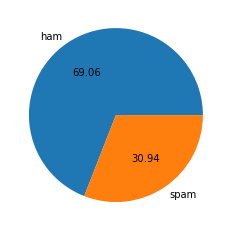

In [11]:
# Importing the matplotlib library for data visualization
import matplotlib.pyplot as plt

# Creating a pie chart to visualize the distribution of 'ham' and 'spam' labels in the dataset
# whole_dataset['Label'].value_counts() counts the occurrences of each label (0 for 'ham', 1 for 'spam')
# 'labels' specifies the label names for the chart slices
# 'autopct' specifies the format of the percentage labels on the pie chart
plt.pie(whole_dataset['Label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

# Displaying the pie chart
plt.show()

In [14]:
# Importing the Natural Language Toolkit (nltk) for text processing
import nltk

# Downloading the 'punkt' tokenizer model for text processing
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Farneet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# Adding a new column to the DataFrame that stores the number of characters in each message
# The 'apply' function applies the 'len' function to each entry in the 'Message' column
# The result is stored in a new column called 'num_characters'
whole_dataset['num_characters'] = whole_dataset['Message'].apply(len)

# Displaying the updated DataFrame (optional, depending on where this code is running)
whole_dataset

C:\Users\Farneet\AppData\Local\Temp/ipykernel_17784/2387067369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_dataset['num_characters'] = whole_dataset['Message'].apply(len)


,Label,Message,num_characters
0,0,"""Can we go for a team lunch this Friday?""",41
1,0,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...,144
2,0,Pathaya enketa maraikara pa',28
3,0,"""I've made some changes to the proposal. Can y...",60
4,1,"""Say goodbye to all your health problems. Clic...",67
...,...,...,...
7702,0,He is there. You call and meet him,34
7703,1,"""You've won a lifetime supply of our premium c...",69
7704,0,Once free call me sir. I am waiting for you.,44
7705,0,Mmm thats better now i got a roast down me! iå...,103


In [16]:
# Adding a new column to the DataFrame that stores the number of words in each message
# The 'apply' function uses a lambda function to apply 'nltk.word_tokenize' for word tokenization
# The length of the resulting list of words is then stored in the 'num_words' column
whole_dataset['num_words'] = whole_dataset['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

# Adding another new column to the DataFrame that stores the number of sentences in each message
# The 'apply' function uses a lambda function to apply 'nltk.sent_tokenize' for sentence tokenization
# The length of the resulting list of sentences is then stored in the 'num_sentences' column
whole_dataset['num_sentences'] = whole_dataset['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Displaying the updated DataFrame
whole_dataset

C:\Users\Farneet\AppData\Local\Temp/ipykernel_17784/3683932349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_dataset['num_words'] = whole_dataset['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\Farneet\AppData\Local\Temp/ipykernel_17784/3683932349.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_dataset['num_sentences'] = whole_dataset['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))


,Label,Message,num_characters,num_words,num_sentences
0,0,"""Can we go for a team lunch this Friday?""",41,12,1
1,0,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...,144,34,1
2,0,Pathaya enketa maraikara pa',28,5,1
3,0,"""I've made some changes to the proposal. Can y...",60,16,2
4,1,"""Say goodbye to all your health problems. Clic...",67,16,2
...,...,...,...,...,...
7702,0,He is there. You call and meet him,34,9,2
7703,1,"""You've won a lifetime supply of our premium c...",69,17,2
7704,0,Once free call me sir. I am waiting for you.,44,12,2
7705,0,Mmm thats better now i got a roast down me! iå...,103,27,3


In [17]:
# Examining statistical details of features for messages labeled as 'Ham' (Label = 0)
# We filter the DataFrame to include only rows where 'Label' is 0
# Then, we extract the columns 'num_characters', 'num_words', and 'num_sentences'
# The 'describe()' function is applied to show statistical details like count, mean, std, min, etc.
whole_dataset[whole_dataset['Label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4904.000000,4904.000000,4904.000000
mean,69.076672,16.764886,1.753670
std,54.328476,13.009590,1.326892
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,86.000000,21.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
# Examining statistical details of features for messages labeled as 'Spam' (Label = 1)
# We filter the DataFrame to include only rows where 'Label' is 1
# Then, we extract the columns 'num_characters', 'num_words', and 'num_sentences'
# The 'describe()' function is applied to provide statistical details like count, mean, std, min, etc.
whole_dataset[whole_dataset['Label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2197.000000,2197.000000,2197.000000
mean,95.836140,20.346381,2.274465
std,54.725466,9.940016,0.993031
min,13.000000,2.000000,1.000000
25%,62.000000,14.000000,2.000000
50%,73.000000,16.000000,2.000000
75%,132.000000,25.000000,2.000000
max,385.000000,71.000000,9.000000


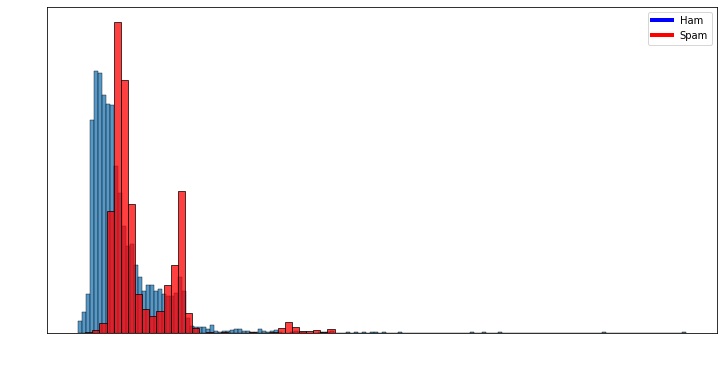

In [24]:
# Importing seaborn for advanced data visualization
import seaborn as sns
# Importing matplotlib for basic data visualization
import matplotlib.pyplot as plt
# Importing Line2D to create custom legend elements
from matplotlib.lines import Line2D

# Creating a figure with specified dimensions (12 units wide by 6 units tall)
plt.figure(figsize=(12, 6))

# Creating a histogram for 'num_characters' for messages labeled as 'Ham' (Label = 0)
# The color of the histogram is default blue
a = sns.histplot(whole_dataset[whole_dataset['Label'] == 0]['num_characters'])

# Creating a histogram for 'num_characters' for messages labeled as 'Spam' (Label = 1)
# The color of the histogram is set to red
b = sns.histplot(whole_dataset[whole_dataset['Label'] == 1]['num_characters'], color='red')

# Setting the x-axis label to 'num_characters' and setting its color to white
a.set_xlabel("num_characters", color="white")

# Setting the y-axis label to 'Count' and setting its color to white
a.set_ylabel("Count", color="white")

# Setting the x-axis tick colors to white
a.tick_params(axis='x', colors='white')

# Setting the y-axis tick colors to white
a.tick_params(axis='y', colors='white')

# Creating custom legend elements
legend_elements = [Line2D([0], [0], color="blue", lw=4, label="Ham"),
                   Line2D([0], [0], color="red", lw=4, label="Spam")]

# Adding the legend to the plot
plt.legend(handles=legend_elements)

# Displaying the histogram
plt.show()

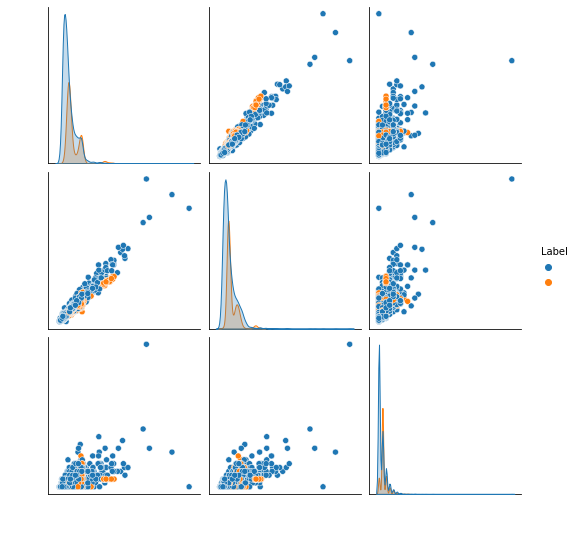

In [25]:
# Creating a pairplot for the DataFrame to visualize the relationships between all numerical features
# The 'hue' parameter is set to 'Label' to color-code the points by their label (Ham or Spam)
g = sns.pairplot(whole_dataset, hue='Label')

# Accessing the legend object created by the pairplot
legend = g._legend

# Setting the color of the legend text to white for better visibility
# First text corresponds to 'Ham' (0) and the second to 'Spam' (1)
legend.get_texts()[0].set_color("white")
legend.get_texts()[1].set_color("white")

# Looping through all the subplot axes to set label and tick colors to white
for ax in g.axes.flatten():
    # Setting the x-axis label color to white
    ax.xaxis.label.set_color('white')
    
    # Setting the y-axis label color to white
    ax.yaxis.label.set_color('white')
    
    # Setting the x-axis tick colors to white
    ax.tick_params(axis='x', colors='white')
    
    # Setting the y-axis tick colors to white
    ax.tick_params(axis='y', colors='white')

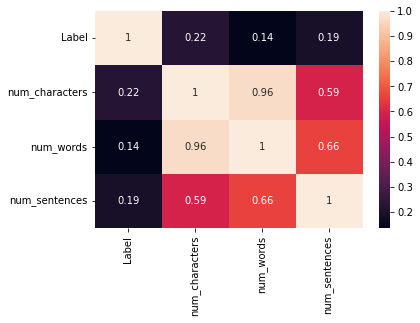

In [26]:
# Creating a heatmap to visualize the correlation between numerical features in the DataFrame
# The 'annot=True' argument enables the display of correlation coefficients on the heatmap
ax = sns.heatmap(whole_dataset.corr(), annot=True)

# Noting an observation based on the heatmap
# The label (ham or spam) appears to have maximum correlation with the 'num_characters' feature

# 3. Data Preprocessing

## I. Lowercase
## II. Tokenisation
## III.Removing special characters
## IV. Removing stop words and punctuation
## V. Stemming

In [27]:
# Downloading the stopwords package from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Farneet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# Importing required libraries
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

# Initializing Porter Stemmer
ps = PorterStemmer()

# Defining the list of stopwords
t = stopwords.words('english')

# Defining function to preprocess and clean text
def transform_text(text):
    # Converting text to lowercase
    text = text.lower()
    print(text)
    
    # Tokenizing the text into individual words
    text = nltk.word_tokenize(text)
    print(text)
    
    # Initialize an empty list to store alphanumeric tokens
    y = []
    
    # Removing any special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    # Removing stopwords and punctuation
    for i in text:
        if i not in t and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    # Applying stemming to the tokens
    for i in text:
        y.append(ps.stem(i))
        
    # Joining the tokens back into a string
    return " ".join(y)

# Testing the function on a sample text
print(transform_text('Hi, How you doing Dhruv'))

hi, how you doing dhruv
['hi', ',', 'how', 'you', 'doing', 'dhruv']
hi dhruv


In [24]:
# Applying the 'transform_text' function to the 'Message' column of the DataFrame
# The resulting transformed text will be stored in a new column named 'transformed_text'
whole_dataset['transformed_text'] = whole_dataset['Message'].apply(transform_text)

In [25]:
# Displaying the Dataframe
whole_dataset

,Label,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"""Can we go for a team lunch this Friday?""",41,12,1,go team lunch friday
1,0,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...,144,34,1,yalru lyfu astn chikku bt innu mundh lyf ali h...
2,0,Pathaya enketa maraikara pa',28,5,1,pathaya enketa maraikara pa
3,0,"""I've made some changes to the proposal. Can y...",60,16,2,made chang propos review
4,1,"""Say goodbye to all your health problems. Clic...",67,16,2,say goodby health problem click know
...,...,...,...,...,...,...
7702,0,He is there. You call and meet him,34,9,2,call meet
7703,1,"""You've won a lifetime supply of our premium c...",69,17,2,lifetim suppli premium coffe click claim
7704,0,Once free call me sir. I am waiting for you.,44,12,2,free call sir wait
7705,0,Mmm thats better now i got a roast down me! iå...,103,27,3,mmm that better got roast iåõd b better drink ...


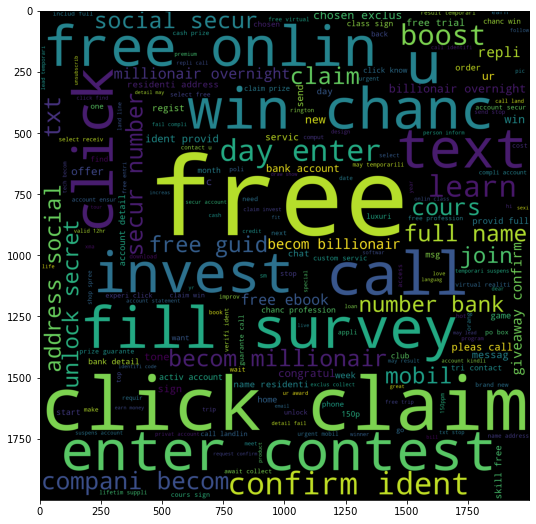

In [31]:
# Importing the WordCloud library
from wordcloud import WordCloud

# Setting up the dimensions of the plot
plt.figure(figsize=(18, 9))

# Initializing a WordCloud object with specific dimensions and minimum font size
wc = WordCloud(width=2000, height=2000, min_font_size=10)

# Generating a WordCloud for messages labeled as 'Spam' 
# We concatenate all the transformed text of spam messages into one large string
spam_wc = wc.generate(whole_dataset[whole_dataset['Label'] == 1]['transformed_text'].str.cat(sep=" "))

# Displaying the WordCloud
plt.imshow(spam_wc)

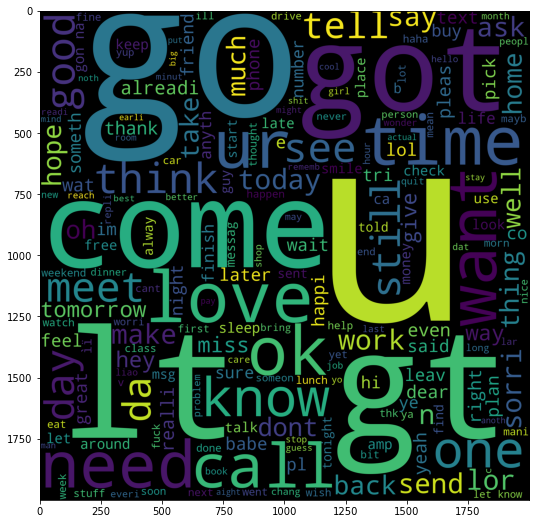

In [32]:
# Setting up the dimensions of the plot for displaying the WordCloud
plt.figure(figsize=(18, 9))

# Generating a WordCloud for messages labeled as 'Ham'
# Concatenating all the transformed text of ham messages into one large string
ham_wc = wc.generate(whole_dataset[whole_dataset['Label'] == 0]['transformed_text'].str.cat(sep=" "))

# Displaying the WordCloud for 'Ham' messages
plt.imshow(ham_wc)

In [27]:
# Initialize an empty list to hold the most frequent words in spam messages (IMPORTANT)
spam_corpus = []

# Extracting all the transformed text for messages labeled as 'Spam' into a list
all_Words = whole_dataset[whole_dataset['Label'] == 1]['transformed_text'].tolist()

# Looping through the list of all transformed spam messages
for i in all_Words:
    # Tokenizing each message into individual words
    for word in i.split():
        # Appending each word to the spam_corpus list
        spam_corpus.append(word)

# Display the first 10 elements of spam_corpus list
spam_corpus[:10]

# At this point, spam_corpus contains all the words from spam messages

['say',
 'goodby',
 'health',
 'problem',
 'click',
 'know',
 'get',
 'free',
 'guid',
 'becom']

C:\Users\Farneet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Farneet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


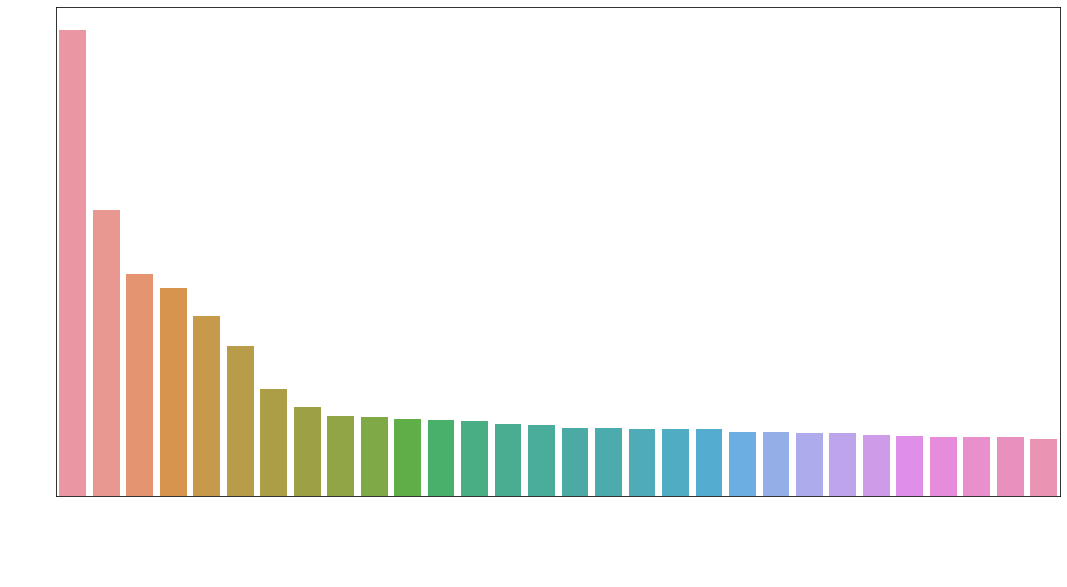

In [34]:
# Importing the Counter class from collections to find the frequency of each word in spam_corpus
from collections import Counter

# Finding the 30 most common words in spam_corpus
Counter(spam_corpus).most_common(30)

# Converting the 30 most common words into a DataFrame
spam_data = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Setting up the dimensions of the plot
plt.figure(figsize=(18, 9))

# Creating a barplot to visualize the 30 most common words in spam messages
ax = sns.barplot(spam_data[0], spam_data[1])

# Setting the axis labels and customizing their appearance
ax.set_xlabel("Words", fontsize=16, color='white')
ax.set_ylabel("Frequency", fontsize=16, color='white')

# Customizing the tick parameters for both axes
ax.tick_params(axis='both', labelsize=12, colors='white')

# Rotating x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Displaying the barplot
sns.barplot(spam_data[0], spam_data[1])
plt.show()

C:\Users\Farneet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


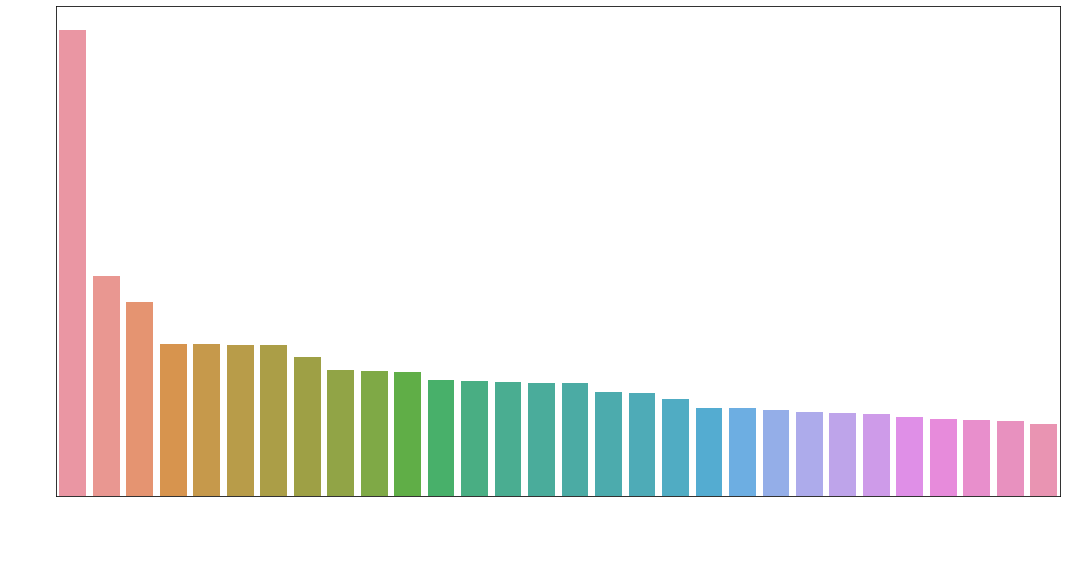

In [35]:
# Initialize an empty list to hold the most frequent words in ham messages (IMPORTANT)
ham_corpus = []

# Extracting all the transformed text for messages labeled as 'Ham' into a list
all_Words = whole_dataset[whole_dataset['Label'] == 0]['transformed_text'].tolist()

# Looping through the list of all transformed ham messages
for i in all_Words:
    # Tokenizing each message into individual words
    for word in i.split():
        # Appending each word to the ham_corpus list
        ham_corpus.append(word)

# Importing the Counter class from collections to find the frequency of each word in ham_corpus
from collections import Counter

# Finding the 30 most common words in ham_corpus and converting them into a DataFrame
ham_data = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Setting up the dimensions of the plot
plt.figure(figsize=(18, 9))

# Creating a barplot to visualize the 30 most common words in ham messages
ax = sns.barplot(ham_data[0], ham_data[1])

# Setting the axis labels and customizing their appearance
ax.set_xlabel("Words", fontsize=16, color='white')
ax.set_ylabel("Frequency", fontsize=16, color='white')

# Customizing the tick parameters for both axes
ax.tick_params(axis='both', labelsize=12, colors='white')

# Rotating x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Displaying the barplot
plt.show()

# 4. Model Building

# Naive Bayes Algorithm

In [36]:
# Naive Bayes Algorithm typically performs well on textual data.
# We will test multiple algorithms to identify the one that yields the best performance.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a CountVectorizer object to convert text to numerical vectors.
cv = CountVectorizer() 

# Import the TfidfVectorizer class, which transforms text to weighted frequency-based features.
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object limited to the most frequent 3000 features.
# This often helps in increasing the precision of the Multinomial Naive Bayes model.
tfidf = TfidfVectorizer(max_features=3000) 

# Fit and transform the text data into numerical vectors.
# We opt for using TfidfVectorizer here instead of CountVectorizer.
# The resulting array 'x' will have a shape indicating the number of samples and features.
x = tfidf.fit_transform(whole_dataset['transformed_text']).toarray()

# Display the shape of 'x' to verify its dimensions.
x.shape

(7101, 3000)

In [37]:
# Assign the 'Label' column values to the variable 'y' to be used as target labels for our model.
y = whole_dataset['Label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
# Using sklearn's train_test_split function to split the dataset into training and testing sets.
# 80% of the data will be used for training and the remaining 20% will be used for testing.
# Setting 'random_state' to 2 ensures that the splits we generate are reproducible.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [39]:
# Importing required libraries for Naive Bayes models and metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [40]:
# Initializing the Naive Bayes classifiers
gnb = GaussianNB()  # Gaussian Naive Bayes
mnb = MultinomialNB()  # Multinomial Naive Bayes
bnb = BernoulliNB()  # Bernoulli Naive Bayes

In [41]:
# Gaussian Naive Bayes Model
# Training the Gaussian Naive Bayes model using the training data
gnb.fit(x_train, y_train)
# Making predictions on the test data
y_pred1 = gnb.predict(x_test)
# Printing the accuracy, confusion matrix, and precision of the Gaussian Naive Bayes model
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8346235045742435
[[799 200]
 [ 35 387]]
0.6592844974446337


In [42]:
# Multinomial Naive Bayes Model
# Training the Multinomial Naive Bayes model using the training data
mnb.fit(x_train, y_train)
# Making predictions on the test data
y_pred2 = mnb.predict(x_test)
# Printing the accuracy, confusion matrix, and precision of the Multinomial Naive Bayes model
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9697396199859254
[[985  14]
 [ 29 393]]
0.9656019656019657


In [43]:
# Bernoulli Naive Bayes Model
# Training the Bernoulli Naive Bayes model using the training data
bnb.fit(x_train, y_train)
# Making predictions on the test data
y_pred3 = bnb.predict(x_test)
# Printing the accuracy, confusion matrix, and precision of the Bernoulli Naive Bayes model
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9788881069669247
[[991   8]
 [ 22 400]]
0.9803921568627451


# 5. Applying Various ML Algorithms

In [44]:
# Importing Machine Learning algorithms and ensemble models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB  # Chosen for high accuracy in previous tests
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
# Initializing classifiers with chosen hyperparameters
svc = SVC(kernel='sigmoid', gamma=1.0)  # Support Vector Classifier
knc = KNeighborsClassifier()  # K-Neighbors Classifier
bnb = BernoulliNB()  # Bernoulli Naive Bayes
dtc = DecisionTreeClassifier(max_depth=5)  # Decision Tree Classifier with max depth 5
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # Logistic Regression with L1 penalty
rfc = RandomForestClassifier(n_estimators=50, random_state=2)  # Random Forest Classifier with 50 estimators
abc = AdaBoostClassifier(n_estimators=50, random_state=2)  # AdaBoost Classifier with 50 estimators
bc = BaggingClassifier(n_estimators=50, random_state=2)  # Bagging Classifier with 50 estimators
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)  # Extra Trees Classifier with 50 estimators
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)  # Gradient Boosting Classifier with 50 estimators
xgb = XGBClassifier(n_estimators=50, random_state=2)  # XGBoost Classifier with 50 estimators

In [68]:
# Dictionary of classifiers for easier iteration
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [69]:
# Function to train a classifier and return accuracy and precision
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)  # Train the classifier on the training data
    y_pred = clf.predict(x_test)  # Make predictions on the test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred)  # Calculate precision
    
    return accuracy, precision

In [70]:
# Lists to hold accuracy and precision scores for each classifier
accuracyScores = []
precisionScores = []

# Iterating through each classifier, training it, and storing its scores
for name, clf in clfs.items():
    current_Accuracy, current_Precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print('For ', name)
    print('The accuracy of ', name, ' is ', current_Accuracy)
    print('The precision of ', name, ' is ', current_Precision)
    print()
    
    accuracyScores.append(current_Accuracy)
    precisionScores.append(current_Precision)

For  SVC
The accuracy of  SVC  is  0.971850809289233
The precision of  SVC  is  0.9727722772277227

For  KN
The accuracy of  KN  is  0.8627726952850105
The precision of  KN  is  0.9956331877729258

For  NB
The accuracy of  NB  is  0.9788881069669247
The precision of  NB  is  0.9803921568627451

For  DT
The accuracy of  DT  is  0.8930330752990852
The precision of  DT  is  0.956081081081081

For  LR
The accuracy of  LR  is  0.9465165376495426
The precision of  LR  is  0.9576719576719577

For  RF
The accuracy of  RF  is  0.9662209711470795
The precision of  RF  is  0.9583333333333334

For  AdaBoost
The accuracy of  AdaBoost  is  0.9493314567206192
The precision of  AdaBoost  is  0.928921568627451

For  BgC
The accuracy of  BgC  is  0.9479239971850809
The precision of  BgC  is  0.9084507042253521

For  ETC
The accuracy of  ETC  is  0.9739619985925405
The precision of  ETC  is  0.972972972972973

For  GBDT
The accuracy of  GBDT  is  0.9183673469387755
The precision of  GBDT  is  0.947368421

In [75]:
# Creating a DataFrame to display the accuracy and precision scores
temp_df = pd.DataFrame({'Name of Method' : clfs.keys(), 'Accuracy': accuracyScores, 'Precision' : precisionScores}).sort_values('Precision', ascending=False)
temp_df

,Name of Method,Accuracy,Precision
1,KN,0.862773,0.995633
2,NB,0.978888,0.980392
8,ETC,0.973962,0.972973
0,SVC,0.971851,0.972772
5,RF,0.966221,0.958333
10,xgb,0.950035,0.958225
4,LR,0.946517,0.957672
3,DT,0.893033,0.956081
9,GBDT,0.918367,0.947368
6,AdaBoost,0.949331,0.928922


In [72]:
# Import additional metrics
from sklearn.metrics import recall_score, f1_score

In [76]:
# Lists to hold recall and F1 scores for each classifier
recallScores = []
F1Scores = []

# Function to print other performance metrics (recall and F1 score) and the confusion matrix
def otherparameters(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)  # Train the model
    y_pred = clf.predict(x_test)  # Make predictions
    conf_matrix = confusion_matrix(y_test, y_pred)  # Generate confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)
    recallScores.append(recall)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)
    F1Scores.append(f1)
    print("\n\n")

# Run the additional performance metrics for each classifier
for name, clf in clfs.items():
    print("For ", name)
    otherparameters(clf, x_train, y_train, x_test, y_test)

For  SVC
Confusion Matrix:
[[988  11]
 [ 29 393]]
Recall: 0.9312796208530806
F1 Score: 0.9515738498789346



For  KN
Confusion Matrix:
[[998   1]
 [194 228]]
Recall: 0.5402843601895735
F1 Score: 0.7004608294930875



For  NB
Confusion Matrix:
[[991   8]
 [ 22 400]]
Recall: 0.9478672985781991
F1 Score: 0.9638554216867469



For  DT
Confusion Matrix:
[[986  13]
 [139 283]]
Recall: 0.6706161137440758
F1 Score: 0.7883008356545961



For  LR
Confusion Matrix:
[[983  16]
 [ 60 362]]
Recall: 0.8578199052132701
F1 Score: 0.9049999999999999



For  RF
Confusion Matrix:
[[982  17]
 [ 31 391]]
Recall: 0.9265402843601895
F1 Score: 0.9421686746987953



For  AdaBoost
Confusion Matrix:
[[970  29]
 [ 43 379]]
Recall: 0.8981042654028436
F1 Score: 0.9132530120481929



For  BgC
Confusion Matrix:
[[960  39]
 [ 35 387]]
Recall: 0.9170616113744076
F1 Score: 0.9127358490566038



For  ETC
Confusion Matrix:
[[988  11]
 [ 26 396]]
Recall: 0.9383886255924171
F1 Score: 0.9553679131483717



For  GBDT
Confusion

In [78]:
# Create a DataFrame to hold the recall and F1 scores for each classifier
re_df = pd.DataFrame({'Name of Method' : clfs.keys(), 'Recall': recallScores, 'f1 Score' : F1Scores})
re_df

,Name of Method,Recall,f1 Score
0,SVC,0.931280,0.951574
1,KN,0.540284,0.700461
2,NB,0.947867,0.963855
3,DT,0.670616,0.788301
4,LR,0.857820,0.905000
5,RF,0.926540,0.942169
6,AdaBoost,0.898104,0.913253
7,BgC,0.917062,0.912736
8,ETC,0.938389,0.955368
9,GBDT,0.767773,0.848168


In [79]:
# Merge the previous DataFrame (temp_df) that had Accuracy and Precision with the new DataFrame (re_df)
# Sort them by all performance metrics in descending order
final_df = temp_df.merge(re_df, on="Name of Method").sort_values(['Accuracy', 'Precision', 'Recall', 'f1 Score'], ascending=False)
final_df

,Name of Method,Accuracy,Precision,Recall,f1 Score
1,NB,0.978888,0.980392,0.947867,0.963855
2,ETC,0.973962,0.972973,0.938389,0.955368
3,SVC,0.971851,0.972772,0.931280,0.951574
4,RF,0.966221,0.958333,0.926540,0.942169
5,xgb,0.950035,0.958225,0.869668,0.911801
9,AdaBoost,0.949331,0.928922,0.898104,0.913253
10,BgC,0.947924,0.908451,0.917062,0.912736
6,LR,0.946517,0.957672,0.857820,0.905000
8,GBDT,0.918367,0.947368,0.767773,0.848168
7,DT,0.893033,0.956081,0.670616,0.788301


In [80]:
# Import VotingClassifier for ensemble learning
from sklearn.ensemble import VotingClassifier

# Importing top performing classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier

In [81]:
# Initialize the top 3 classifiers based on previous evaluations
svc = SVC()  # Support Vector Classifier
nb = BernoulliNB()  # Bernoulli Naive Bayes
etc = ExtraTreesClassifier()  # Extra Trees Classifier

# The VotingClassifier will be initialized using these models later

In [82]:
# Initialize the VotingClassifier with the top 3 classifiers: SVC, ExtraTreesClassifier, and BernoulliNB.
# 'hard' voting is used, meaning the VotingClassifier will predict the class label based on the majority (plurality) of the class labels
# predicted by the individual classifiers.
voting_classifier = VotingClassifier(estimators=[('svc', svc), ('etc', etc), ('nb', nb)], voting='hard')

# Fit the VotingClassifier to the training data. 
# This will internally fit each of the individual classifiers on the training data.
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('svc', SVC()), ('etc', ExtraTreesClassifier()),
                             ('nb', BernoulliNB())])

In [83]:
# Using Voting Classifier for Ensemble Learning
# Make predictions with the Voting Classifier and evaluate its performance
y_pred = voting_classifier.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

# Display the confusion matrix for the Voting Classifier
voting_conf_matrix = confusion_matrix(y_test, y_pred);
print("Confusion Matrix:")
print(voting_conf_matrix)    

# Calculate and display recall score for the Voting Classifier
voting_recall = recall_score(y_test, y_pred)
print("Recall:", voting_recall)

# Calculate and display F1 score for the Voting Classifier
voting_f1 = f1_score(y_test, y_pred)
print("F1 Score:", voting_f1)

Accuracy 0.9809992962702322
Precision 0.9900744416873449
Confusion Matrix:
[[995   4]
 [ 23 399]]
Recall: 0.9454976303317536
F1 Score: 0.9672727272727273


In [ ]:
# Applying Stacking Classifier for Ensemble Learning
# Define base estimators and the final estimator (RandomForest in this case)
estimators=[('svc', svc), ('nb', nb), ('rf', rf)]
final_estimator=RandomForestClassifier()

# Initialize and fit the Stacking Classifier
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x_train,y_train)

# Make predictions with the Stacking Classifier and evaluate its performance
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

# Display the confusion matrix for the Stacking Classifier
stack_conf_matrix = confusion_matrix(y_test, y_pred);
print("Confusion Matrix:")
print(stack_conf_matrix)    

# Calculate and display recall score for the Stacking Classifier
stack_recall = recall_score(y_test, y_pred)
print("Recall:", stack_recall)

# Calculate and display F1 score for the Stacking Classifier
stack_f1 = f1_score(y_test, y_pred)
print("F1 Score:", stack_f1)

In [84]:
# Define the classifier function
def classifier():
    # Take the message as user input
    message = input("Enter the message:")
    
    # Preprocess the input message using the pre-defined transform_text function
    transformed_sms = transform_text(message)
    
    # Convert the preprocessed message into numerical form using the pre-trained tf-idf vectorizer
    vector_input = tfidf.transform([transformed_sms])
    
    # Convert the sparse matrix to array
    vector_input = vector_input.toarray()
    
    # Make prediction using the pre-trained voting_classifier
    result = voting_classifier.predict(vector_input)[0]
    
    # Output the result as either "Spam" or "Ham"
    if(result == 1):
        print("Spam")
    else:
        print("Ham")

In [92]:
count = 0
while (count <= 10):
    count += 1  # Increment the counter
    classifier()  # Call the classifier function to classify the message

Enter the message:"Limited time offer! Buy one, get one free on all our products. Shop now and save big!"
"limited time offer! buy one, get one free on all our products. shop now and save big!"
['``', 'limited', 'time', 'offer', '!', 'buy', 'one', ',', 'get', 'one', 'free', 'on', 'all', 'our', 'products', '.', 'shop', 'now', 'and', 'save', 'big', '!', "''"]
Spam
Enter the message:"Earn passive income from home! Join our affiliate program and start making money today."
"earn passive income from home! join our affiliate program and start making money today."
['``', 'earn', 'passive', 'income', 'from', 'home', '!', 'join', 'our', 'affiliate', 'program', 'and', 'start', 'making', 'money', 'today', '.', "''"]
Spam
Enter the message:"Hi Alice, I wanted to check if you received the package I sent you. Please let me know if everything arrived in good condition."
"hi alice, i wanted to check if you received the package i sent you. please let me know if everything arrived in good condition."
['`

# 6. Downloading the Model

In [93]:
import pickle  # Importing the pickle library to save the model and vectorizer

# Saving the TF-IDF vectorizer object to a pickle file
# 'wb' stands for 'write binary'
pickle.dump(tfidf, open('vector.pkl', 'wb'))

# Saving the Voting Classifier model to a pickle file
# 'wb' again stands for 'write binary'
pickle.dump(voting_classifier, open('advanced.pkl', 'wb'))